In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv("data/PS_2023.06.30_08.16.23.csv", header=290)

/tmp/ipykernel_588936/2613126606.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/PS_2023.06.30_08.16.23.csv", header=290)


In [3]:
COMPACT_RATIO = 1.3


mask = (
       (data["soltype"] == "Published Confirmed")
       * (data["default_flag"] == 1)
       * (data["sy_pnum"] > 3)
       # * (data["cb_flag"] == 0)
       * (data["tran_flag"] ==1)
       * ((~np.isnan(data["pl_masse"])))
       )

planets = data[mask]

sys = {}

for p in planets.iterrows():
    p = p[1]
    if not sys.get(p["hostname"], False): 
           sys[p["hostname"]] = {
              "name": p["hostname"],
              "st_mass": p["st_mass"],
              "st_upper": p["st_masserr1"],
              "st_lower": p["st_masserr2"],
              "st_lim": p["st_masslim"],
              "st_ref": p["st_refname"],
              
                  
              "mass": [p["pl_masse"]],
              "mass_upper":[p["pl_masseerr1"]],
              "mass_lower":[p["pl_masseerr2"]],
              "mass_lim":[p["pl_masselim"]],
              
              "r": [p["pl_rade"]],
              "r_upper":[p["pl_radeerr1"]],
              "r_lower":[p["pl_radeerr2"]],
              "r_lim":[p["pl_radelim"]],

              "e": [p["pl_orbeccen"]],
              "e_upper": [p["pl_orbeccenerr1"]],
              "e_lower": [p["pl_orbeccenerr2"]],
              "e_lim": [p["pl_orbeccenlim"]],
              
              "a": [p["pl_orbsmax"]],
              "a_upper": [p["pl_orbsmaxerr1"]],
              "a_lower": [p["pl_orbsmaxerr2"]],
              "a_lim": [p["pl_orbsmaxlim"]],

              "inc":[p["pl_orbincl"]],
              "inc_upper":[p["pl_orbinclerr1"]],
              "inc_lower":[p["pl_orbinclerr2"]],
              "inc_lim":[p["pl_orbincllim"]],
              
              "ref":[p["pl_refname"]],
              }
    else:
           sys[p["hostname"]]["mass"].append(p["pl_masse"])
           sys[p["hostname"]]["mass_upper"].append(p["pl_masseerr1"])
           sys[p["hostname"]]["mass_lower"].append(p["pl_masseerr2"])
           sys[p["hostname"]]["mass_lim"].append(p["pl_masselim"])

           sys[p["hostname"]]["r"].append(p["pl_rade"])
           sys[p["hostname"]]["r_upper"].append(p["pl_radeerr1"])
           sys[p["hostname"]]["r_lower"].append(p["pl_radeerr2"])
           sys[p["hostname"]]["r_lim"].append(p["pl_radelim"])       
           
           sys[p["hostname"]]["e"].append(p["pl_orbeccen"])
           sys[p["hostname"]]["e_upper"].append(p["pl_orbeccenerr1"])
           sys[p["hostname"]]["e_lower"].append(p["pl_orbeccenerr2"])
           sys[p["hostname"]]["e_lim"].append(p["pl_orbeccenlim"])
           
           sys[p["hostname"]]["a"].append(p["pl_orbsmax"])
           sys[p["hostname"]]["a_upper"].append(p["pl_orbsmaxerr1"])
           sys[p["hostname"]]["a_lower"].append(p["pl_orbsmaxerr2"])
           sys[p["hostname"]]["a_lim"].append(p["pl_orbsmaxlim"])

           sys[p["hostname"]]["inc"].append(p["pl_orbincl"])
           sys[p["hostname"]]["inc_upper"].append(p["pl_orbinclerr1"])
           sys[p["hostname"]]["inc_lower"].append(p["pl_orbinclerr2"])
           sys[p["hostname"]]["inc_lim"].append(p["pl_orbincllim"])

           sys[p["hostname"]]["ref"].append(p["pl_refname"])

compact_sys = []
names = []
dyn_gaps = []
for key in sys.keys():
    s = sys[key]
    order = np.argsort(s["a"])
    s["a"] = np.array(s["a"])[order]
    s["e"] = np.array(s["e"])[order]
    s["mass"] = np.array(s["mass"])[order]
    

    
    a = s["a"]

    if len(a) > 3:
       gaps = a[1:]/a[:-1]
       ratios = gaps/np.min(gaps)

       if (np.any(ratios>COMPACT_RATIO)):
                  compact_sys.append(s)  
                  names.append(key)
                  dyn_gaps.append(ratios)
                  gap = np.argmax(ratios)
                  s["gap"] = [a[gap], a[gap+1]]
              
    
print(len(names))

9


In [4]:
gap

0

In [5]:
np.argmax(ratios)

1

In [6]:
np.save("data/compact_systems.npy", compact_sys)

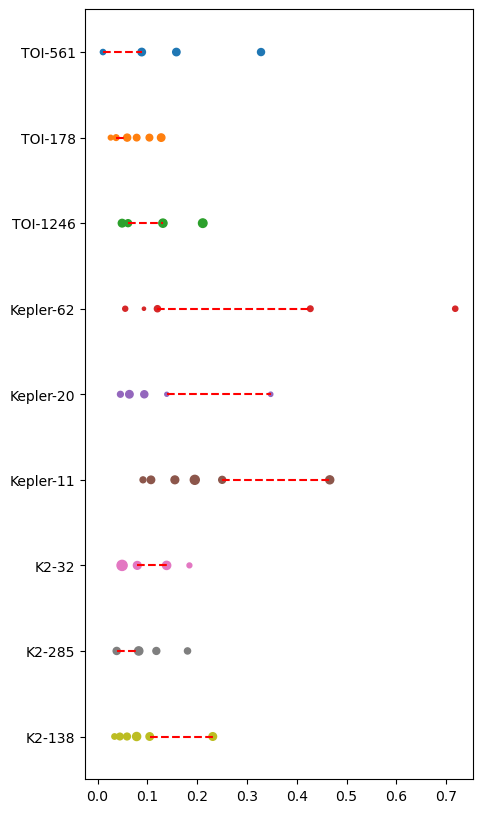

In [7]:
compact_sys[0]
plt.figure(figsize = (5, 10))
for i in range(len(compact_sys)-1, -1, -1):
    # for j in range(len(dyn_gaps[i])):
        # if dyn_gaps[i][j]>COMPACT_RATIO:
        #     plt.plot((compact_sys[i]["a"][j], compact_sys[i]["a"][j+1]),
        #              [i, i],
        #              "r--")
    
    
    plt.scatter(compact_sys[i]["a"], 
                i*np.ones(len(compact_sys[i]["mass"])),
                s=10*np.array(compact_sys[i]["r"]),
                label=names[i],
                # color="black"
                )
    plt.plot(compact_sys[i]["gap"], [i, i],  "r--")
    # plt.text(1.1, i-.08, names[i])
# plt.xlim(0, 1)
plt.ylim(-0.5, len(compact_sys) - 0.5)
plt.savefig("figs/compact_sys.png")
plt.yticks(np.arange(len(compact_sys)),names)
plt.show()
# plt.legend()

In [6]:
len(compact_sys)

39

In [99]:
a = np.array([0.053, 0.122, 0.182, 0.404])
ratio = a[1:]/a[:-1]
ratio
ratio/np.min(ratio)

array([1.54302301, 1.        , 1.48798454])

In [6]:
compact_sys

[{'name': 'K2-138',
  'st_mass': 0.94,
  'st_upper': 0.02,
  'st_lower': -0.02,
  'st_lim': 0.0,
  'st_ref': '<a refstr=LOPEZ_ET_AL__2019 href=https://ui.adsabs.harvard.edu/abs/2019A&A...631A..90L/abstract target=ref>Lopez et al. 2019</a>',
  'mass': array([ 3.1 ,  6.31,  7.92, 12.97,  1.63,  4.32]),
  'mass_upper': [1.05, 1.13, 1.39, 1.98, 2.12, 5.26],
  'mass_lower': [-1.05, -1.23, -1.35, -1.99, -1.18, -3.03],
  'mass_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'r': [1.51, 2.299, 2.39, 3.39, 2.904, 3.013],
  'r_upper': [0.11, 0.12, 0.104, 0.156, 0.164, 0.303],
  'r_lower': [-0.084, -0.087, -0.084, -0.11, -0.111, -0.251],
  'r_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'e': array([0.048, 0.045, 0.043, 0.077, 0.062, 0.059]),
  'e_upper': [0.054, 0.051, 0.041, 0.048, 0.064, 0.063],
  'e_lower': [-0.033, -0.032, -0.03, -0.049, -0.043, -0.04],
  'e_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'a': array([0.03385, 0.04461, 0.05893, 0.0782 , 0.10447, 0.23109]),
  'a_upper': [0.00023, 0.0003, 0.0004, 0.

Text(0, 0.5, 'cumulative fraction')

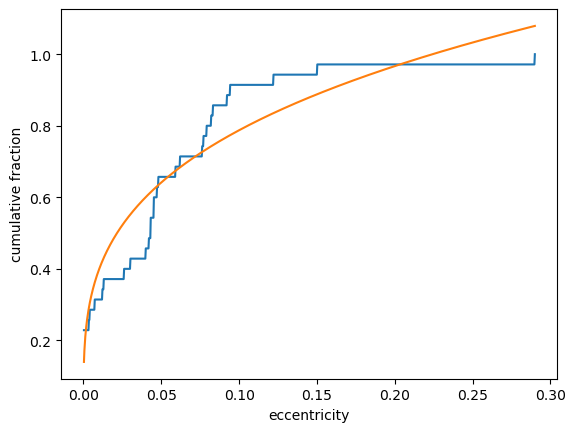

In [195]:
es = []
for i in range(len(compact_sys)):
    es = np.hstack((es, compact_sys[i]["e"]))

n, bins = np.histogram(es[~np.isnan(es) * (es<0.5)], bins=1000)
bins = bins[1:]
n = np.cumsum(n)/np.sum(n)

def _pow(x, a, b):
    return a*x**b

[a, b], corr = curve_fit(_pow, bins, n)

plt.plot(bins, n)
x = np.linspace(bins.min(), bins.max(), 1000)
plt.plot(x, _pow(x,a,b))
# plt.fill_between(x, 
#                  _pow(x, a-np.sqrt(corr[0,0]), b+np.sqrt(corr[1,1])),  
#                 _pow(x, a+np.sqrt(corr[0,0]), b-np.sqrt(corr[1,1])),
#                 color="b", alpha = 0.3)


# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("eccentricity")
plt.ylabel("cumulative fraction")


In [196]:
np.save("e_dist.npy", np.vstack((bins, n)))

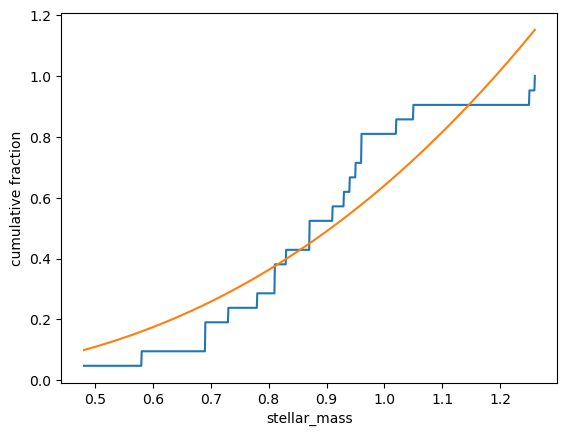

In [9]:
es = []
for i in range(len(compact_sys)):
    es = np.hstack((es, compact_sys[i]["st_mass"]))

n, bins = np.histogram(es[~np.isnan(es) ], bins=1000)
bins = bins[1:]
n = np.cumsum(n)/np.sum(n)

def _pow(x, a, b):
    return a*x**b

[a, b], corr = curve_fit(_pow, bins, n)

plt.plot(bins, n)
x = np.linspace(bins.min(), bins.max(), 1000)
plt.plot(x, _pow(x,a,b))
# plt.fill_between(x, 
#                  _pow(x, a-np.sqrt(corr[0,0]), b+np.sqrt(corr[1,1])),  
#                 _pow(x, a+np.sqrt(corr[0,0]), b-np.sqrt(corr[1,1])),
#                 color="b", alpha = 0.3)


# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("stellar_mass")
plt.ylabel("cumulative fraction")
np.save("st_mass_dist.npy", np.vstack((bins, n)))

In [198]:
a, b

(1.0850496881911795, 4.022118935087078)

In [82]:
for key in sys.keys():
    s = sys[key]
    print(s)
    break

{'mass': [nan, nan, nan], 'e': [0.032, 0.098, 0.16], 'a': [2.1, 3.6, 11.6]}


In [47]:
p[1]["pl_name"]

'14 Her b'

In [55]:
len(sys.keys())

309

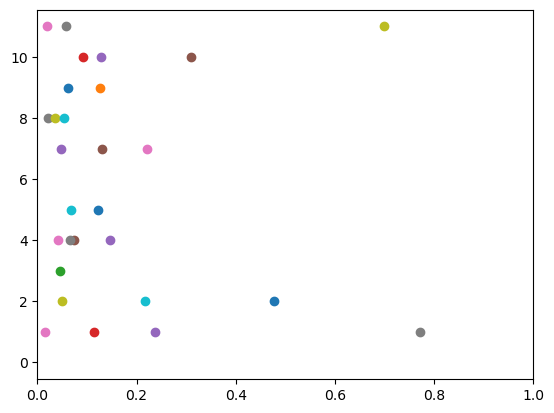

In [74]:

for i in range(len(sys.keys())):
    for p in sys[list(sys.keys())[i]].keys():
        plt.scatter([sys[list(sys.keys())[i]][p]["a"]], [i])
        
    if i > 10: break
    plt.xlim(0, 1)

In [67]:
sys[list(sys.keys())[1]][p]["a"]

0.1134

In [113]:
from scipy.stats import skewnorm, norm


In [130]:
curve_fit?

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, and each element should be float
    convertible if it is an array like object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initia

/home/wcukier/.conda/envs/binary_planets/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


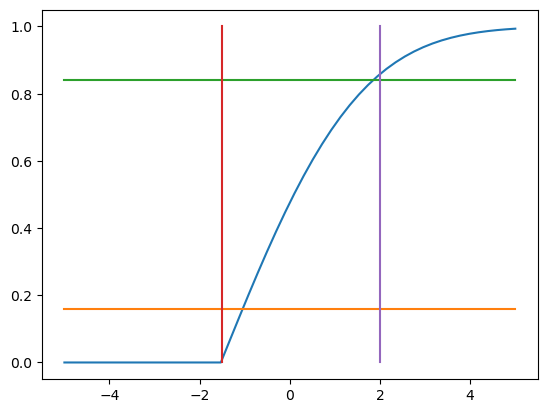

In [170]:
from scipy.special import erf, owens_t
from scipy.optimize import fsolve

upper = 2
lower = -1.5

def equations(p, lo, hi, med):
    a, b, c = p
    return(skewnorm.cdf((lo-a)/b, c) -.16, 
           skewnorm.cdf((med-a)/b, c) -0.5,
           skewnorm.cdf((hi-a)/b, c) -.84)
    
    
a,b,c = fsolve(equations, [1,1,1], args=(-1, 2, 0))

x = np.linspace(-5, 5)
plt.plot(x, skewnorm.cdf((x-a)/b, c))
plt.plot([-5, 5], [.16, .16])
plt.plot([-5,5], [.84, .84])
plt.plot([lower, lower], [0,1])
plt.plot([upper,upper], [0,1])

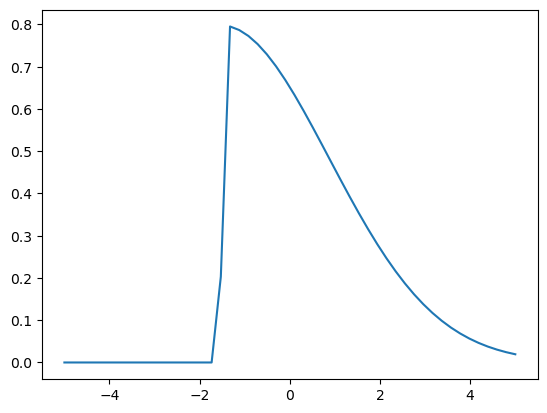

In [168]:
plt.plot(x, skewnorm.pdf((x-a)/b, c))


/home/wcukier/.conda/envs/binary_planets/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


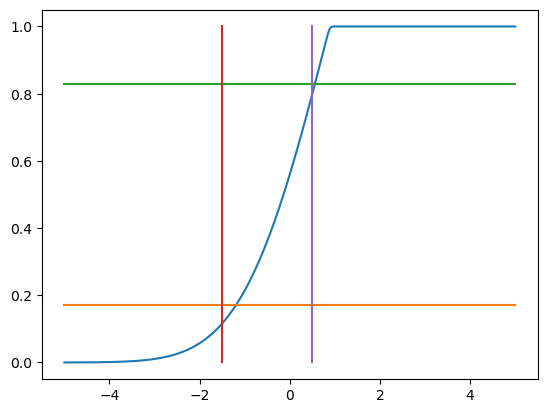

In [8]:
from scipy.stats import skewnorm
upper = .5
lower = -1.5

def f(x, a, b, c):
    # return 1/2*(1 + erf(((x-a)/b)np.sqrt(2))) - 2*owens_t((x-a)/b, c)
    return skewnorm.cdf(x,a,b,c)
    
[a, b, c], _ = curve_fit(f, [lower, 0, upper], [.16, .5, .84])

x = np.linspace(-5, 5, 10000)
plt.plot(x, f(x, a, b, c))
plt.plot([-5, 5], [.17, .17])
plt.plot([-5,5], [.83, .83])
plt.plot([lower, lower], [0,1])
plt.plot([upper,upper], [0,1])

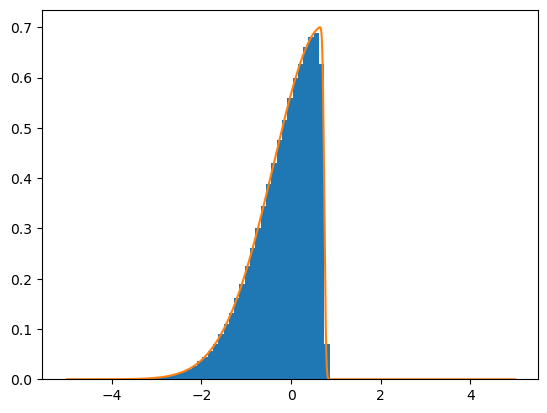

In [245]:
plt.hist((skewnorm.rvs(a,b,c, size=1000000)), density=True, bins=50)
plt.plot(x, skewnorm.pdf(x,a,b,c))

In [10]:
min_mass = np.inf
max_mass = 0
for sys in compact_sys:
    min_mass = min(min_mass, np.min(sys["mass"]))
    max_mass = max(max_mass, np.max(sys["mass"]))

In [11]:
min_mass

0.76

In [12]:
max_mass

36.0

In [251]:
np.load("data/e_dist.npy")

array([[2.90000000e-04, 5.80000000e-04, 8.70000000e-04, ...,
        2.89420000e-01, 2.89710000e-01, 2.90000000e-01],
       [2.28571429e-01, 2.28571429e-01, 2.28571429e-01, ...,
        9.71428571e-01, 9.71428571e-01, 1.00000000e+00]])

In [248]:
from scipy.interpolate import interp1d

In [252]:
from binary_planets.utils import *

In [254]:
%load_ext autoreload
%autoreload 2

In [258]:
compact_sys[0]

{'name': 'K2-138',
 'st_mass': 0.94,
 'st_upper': 0.02,
 'st_lower': -0.02,
 'st_lim': 0.0,
 'st_ref': '<a refstr=LOPEZ_ET_AL__2019 href=https://ui.adsabs.harvard.edu/abs/2019A&A...631A..90L/abstract target=ref>Lopez et al. 2019</a>',
 'mass': array([ 3.1 ,  6.31,  7.92, 12.97,  1.63,  4.32]),
 'mass_upper': [1.05, 1.13, 1.39, 1.98, 2.12, 5.26],
 'mass_lower': [-1.05, -1.23, -1.35, -1.99, -1.18, -3.03],
 'mass_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'r': [1.51, 2.299, 2.39, 3.39, 2.904, 3.013],
 'r_upper': [0.11, 0.12, 0.104, 0.156, 0.164, 0.303],
 'r_lower': [-0.084, -0.087, -0.084, -0.11, -0.111, -0.251],
 'r_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'e': array([0.048, 0.045, 0.043, 0.077, 0.062, 0.059]),
 'e_upper': [0.054, 0.051, 0.041, 0.048, 0.064, 0.063],
 'e_lower': [-0.033, -0.032, -0.03, -0.049, -0.043, -0.04],
 'e_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'a': array([0.03385, 0.04461, 0.05893, 0.0782 , 0.10447, 0.23109]),
 'a_upper': [0.00023, 0.0003, 0.0004, 0.00053, 0.0007, 0.001

In [264]:

get_eccen(compact_sys[0])

in_else_block
30.565279599318565 0.00029320429713491913 0.0716172066842856
in_else_block
32.91609602851774 -0.0009811473557880498 0.06862799596181426
in_else_block
3.2145539229751687 0.005316604709494055 0.05599957165310323
in_else_block
-0.7126666974100822 0.1020179125893225 0.05511126434559874
in_else_block
5.071686961982787 0.0029163106353952695 0.08759958769465254
in_else_block
32.11776562028746 0.0016763286113217748 0.08533551048479039


[0.048 0.045 0.043 0.077 0.062 0.059]
[0.03304017 0.0741467  0.00602863 0.05781556 0.02717955 0.00821142]


array([0.03304017, 0.0741467 , 0.00602863, 0.05781556, 0.02717955,
       0.00821142])

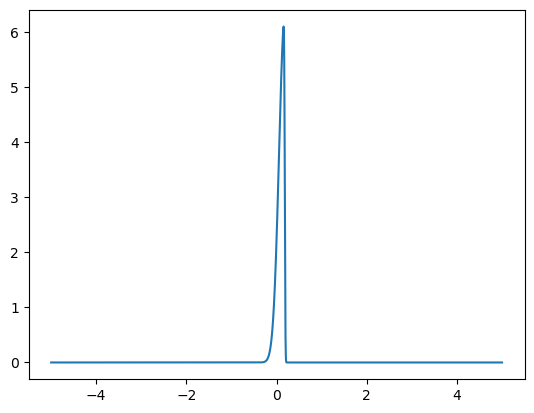

In [262]:
plt.plot(x, skewnorm.pdf(x, -11.645921860932454, 0.18196764786507202, 0.12709571795374391))

In [14]:
compact_sys[0]["gap"]

[0.10447, 0.23109]